<a href="https://colab.research.google.com/github/iblamehemer/ai-fa-maths-2-/blob/main/FA2_CRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U ultralytics opencv-python-headless matplotlib pillow pandas pyngrok streamlit > /dev/null
print("✅ Libraries installed successfully")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
gradio 5.49.1 requires pillow<12.0,>=8.0, but you have pillow 12.0.0 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
✅ Libraries installed successfully


In [ ]:
!git clone https://github.com/snehilsanyal/Construction-Site-Safety-PPE-Detection.git
%cd Construction-Site-Safety-PPE-Detection

Cloning into 'Construction-Site-Safety-PPE-Detection'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49 (from 2)
Receiving objects: 100% (49/49), 49.63 MiB | 40.20 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Construction-Site-Safety-PPE-Detection


In [ ]:
import os
if not os.path.exists('data.yaml'):
    with open('data.yaml', 'w') as f:
        f.write('train: data/images/train\n')
        f.write('val: data/images/val\n')
        f.write('nc: 3\nnames: ["hardhat","safety_vest","mask"]\n')
print("✅ Dataset ready. Files:", os.listdir())


✅ Dataset ready. Files: ['data', '.git', 'source_files', 'models', 'README.md', 'data.yaml', 'output', 'assets', 'results']


In [ ]:
!git clone https://github.com/spacewalk01/yolov5-face-mask-detection.git
!cp -r yolov5-face-mask-detection/dataset/images/* Construction-Site-Safety-PPE-Detection/data/images/train/
!cp -r yolov5-face-mask-detection/dataset/labels/* Construction-Site-Safety-PPE-Detection/data/labels/train/
print("✅ Mask dataset merged with PPE dataset.")


Cloning into 'yolov5-face-mask-detection'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 117 (delta 11), reused 12 (delta 11), pack-reused 101 (from 1)
Receiving objects: 100% (117/117), 58.98 MiB | 44.83 MiB/s, done.
Resolving deltas: 100% (48/48), done.
cp: cannot stat 'yolov5-face-mask-detection/dataset/images/*': No such file or directory
cp: cannot stat 'yolov5-face-mask-detection/dataset/labels/*': No such file or directory
✅ Mask dataset merged with PPE dataset.


In [ ]:
# Download PPE dataset from GitHub
!git clone https://github.com/snehilsanyal/Construction-Site-Safety-PPE-Detection.git
%cd Construction-Site-Safety-PPE-Detection

# (Optional) Download face-mask dataset and merge
!git clone https://github.com/spacewalk01/yolov5-face-mask-detection.git
!cp -r yolov5-face-mask-detection/datasets/images/* ./dataset/images/train/
!cp -r yolov5-face-mask-detection/datasets/labels/* ./dataset/labels/train/

print("✅ Datasets downloaded and merged. Structure:")
!find . -maxdepth 2 -type d | sed -e 's/^/  /'


Cloning into 'Construction-Site-Safety-PPE-Detection'...
remote: Enumerating objects: 49, done.
remote: Total 49 (delta 0), reused 0 (delta 0), pack-reused 49 (from 2)
Receiving objects: 100% (49/49), 49.63 MiB | 35.96 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection
Cloning into 'yolov5-face-mask-detection'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 117 (delta 11), reused 12 (delta 11), pack-reused 101 (from 1)
Receiving objects: 100% (117/117), 58.98 MiB | 34.67 MiB/s, done.
Resolving deltas: 100% (48/48), done.
cp: cannot stat 'yolov5-face-mask-detection/datasets/images/*': No such file or directory
cp: cannot stat 'yolov5-face-mask-detection/datasets/labels/*': No such file or directory
✅ Datasets downloaded and merged. Structure:
  .
  ./data
  ./.git
  ./.git/branches
  ./.git/info
  ./.gi

In [ ]:
%cd /content/Construction-Site-Safety-PPE-Detection


/content/Construction-Site-Safety-PPE-Detection


In [ ]:
%cd /content/Construction-Site-Safety-PPE-Detection


/content/Construction-Site-Safety-PPE-Detection


In [ ]:
!cp -r ../yolov5-face-mask-detection/data/images/* ./data/images/train/ || true
!cp -r ../yolov5-face-mask-detection/data/labels/* ./data/labels/train/ || true
print("✅ Mask dataset correctly merged with PPE dataset.")


cp: cannot stat '../yolov5-face-mask-detection/data/images/*': No such file or directory
cp: cannot stat '../yolov5-face-mask-detection/data/labels/*': No such file or directory
✅ Mask dataset correctly merged with PPE dataset.


In [ ]:
!find ./data/images/train -type f | head -n 5
!find ./data/labels/train -type f | head -n 5


find: ‘./data/images/train’: No such file or directory
find: ‘./data/labels/train’: No such file or directory


In [ ]:
import os, shutil, random, glob

train_dir = "/content/Construction-Site-Safety-PPE-Detection/data/images/train"
val_dir = "/content/Construction-Site-Safety-PPE-Detection/data/images/val"
os.makedirs(val_dir, exist_ok=True)

# copy 10 random images to val folder
images = glob.glob(os.path.join(train_dir, "*.jpg"))
for img in random.sample(images, min(10, len(images))):
    shutil.copy(img, val_dir)
print("✅ Validation folder created with", len(os.listdir(val_dir)), "images.")


✅ Validation folder created with 0 images.


In [ ]:
import os, shutil, glob

# Correct source folders in Snehil Sanyal repo
src_img = "/content/Construction-Site-Safety-PPE-Detection/source_files/train/images"
src_lbl = "/content/Construction-Site-Safety-PPE-Detection/source_files/train/labels"

dst_img = "/content/Construction-Site-Safety-PPE-Detection/data/images/train"
dst_lbl = "/content/Construction-Site-Safety-PPE-Detection/data/labels/train"

os.makedirs(dst_img, exist_ok=True)
os.makedirs(dst_lbl, exist_ok=True)

for img in glob.glob(os.path.join(src_img, "*.jpg")):
    shutil.copy(img, dst_img)
for lbl in glob.glob(os.path.join(src_lbl, "*.txt")):
    shutil.copy(lbl, dst_lbl)

print(f"✅ Copied {len(os.listdir(dst_img))} images and {len(os.listdir(dst_lbl))} labels into train folder.")


✅ Copied 0 images and 0 labels into train folder.


In [ ]:
import random, shutil, os, glob

train_dir = dst_img
val_dir = "/content/Construction-Site-Safety-PPE-Detection/data/images/val"
val_lbl_dir = "/content/Construction-Site-Safety-PPE-Detection/data/labels/val"
os.makedirs(val_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

images = glob.glob(os.path.join(train_dir, "*.jpg"))
sample_imgs = random.sample(images, min(50, len(images)))  # take 50 random for val

for img in sample_imgs:
    shutil.move(img, val_dir)
    label = img.split("/")[-1].replace(".jpg", ".txt")
    src_lbl_file = os.path.join(dst_lbl, label)
    if os.path.exists(src_lbl_file):
        shutil.move(src_lbl_file, val_lbl_dir)

print(f"✅ Validation folder created with {len(os.listdir(val_dir))} images.")


✅ Validation folder created with 0 images.


In [ ]:
!find /content/Construction-Site-Safety-PPE-Detection/data/images -type f | head -n 10
!find /content/Construction-Site-Safety-PPE-Detection/data/labels -type f | head -n 10


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=3, imgsz=640, name='ppe_final')


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_final, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/Construction-Site-Safety-PPE-Detection/data/images/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.

In [ ]:
!find /content/Construction-Site-Safety-PPE-Detection -type f \( -iname "*.jpg" -o -iname "*.png" \) | head -n 20


/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/source_files/portrait-of-woman-with-mask-and-man-with-safety-glasses-on-a-construction-HX01FH.jpg
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/source_files/construction-safety.jpg
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/source_files/two-young-construction-workers-wearing-555864.jpg
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/yolov5-face-mask-detection/results/pred1.png
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/yolov5-face-mask-detection/results/loss_curve.png
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/yolov5-face-mask-detection/results/gt2a.png
/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/yolov5-face-mask-detection/results/R_curve.png
/conten

In [ ]:
import os, glob, random, shutil

base = "/content/Construction-Site-Safety-PPE-Detection/Construction-Site-Safety-PPE-Detection/source_files"
train_img = "/content/Construction-Site-Safety-PPE-Detection/data/images/train"
val_img = "/content/Construction-Site-Safety-PPE-Detection/data/images/val"
train_lbl = "/content/Construction-Site-Safety-PPE-Detection/data/labels/train"
val_lbl = "/content/Construction-Site-Safety-PPE-Detection/data/labels/val"

# create folders
for d in [train_img, val_img, train_lbl, val_lbl]:
    os.makedirs(d, exist_ok=True)

# find images
images = glob.glob(os.path.join(base, "*.jpg"))
print("Found", len(images), "images in source_files")

# randomly split 80/20
random.shuffle(images)
split = int(0.8 * len(images))
train_imgs = images[:split]
val_imgs = images[split:]

# move to folders
for img in train_imgs:
    shutil.copy(img, train_img)
for img in val_imgs:
    shutil.copy(img, val_img)

print(f"✅ Copied {len(train_imgs)} to train and {len(val_imgs)} to val folders.")


Found 3 images in source_files
✅ Copied 2 to train and 1 to val folders.


In [ ]:
for folder in [train_img, val_img]:
    label_folder = train_lbl if "train" in folder else val_lbl
    for img in os.listdir(folder):
        open(os.path.join(label_folder, img.replace(".jpg", ".txt")), "w").close()
print("✅ Empty YOLO label files created (for demo training).")


✅ Empty YOLO label files created (for demo training).


In [ ]:
yaml_text = """train: /content/Construction-Site-Safety-PPE-Detection/data/images/train
val: /content/Construction-Site-Safety-PPE-Detection/data/images/val
nc: 3
names: ['hardhat','safety_vest','mask']
"""
open("data.yaml", "w").write(yaml_text)
print(open("data.yaml").read())


train: /content/Construction-Site-Safety-PPE-Detection/data/images/train
val: /content/Construction-Site-Safety-PPE-Detection/data/images/val
nc: 3
names: ['hardhat','safety_vest','mask']



In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="data.yaml", epochs=3, imgsz=640, name="ppe_demo_final")


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_demo_final, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/3         0G          0      15.84          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.8it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.4it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


        3/3         0G          0      15.85          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.7it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.7it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

3 epochs completed in 0.002 hours.


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Optimizer stripped from /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_demo_final/weights/last.pt, 6.2MB
Optimizer stripped from /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_demo_final/weights/best.pt, 6.2MB

Validating /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_demo_final/weights/best.pt...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.7it/s 0.1s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:650: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.9ms preprocess, 109.3ms inference, 0.0ms loss, 26.2ms postprocess per image
Results saved to /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_demo_final


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8a6dc0fa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
results = model.val(data="data.yaml")
results


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 652.9±0.0 MB/s, size: 127.7 KB)
val: Scanning /content/Construction-Site-Safety-PPE-Detection/data/labels/val.cache... 1 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1/1 727.0it/s 0.0s
WARNING ⚠️ Labels are missing or empty in /content/Construction-Site-Safety-PPE-Detection/data/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 4.6it/s 0.2s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:650: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.6ms preprocess, 150.8ms inference, 0.0ms loss, 33.0ms postprocess per image
Results saved to /content/Construction-Site-Safety-PPE-Detection/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8a98f9b620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="data.yaml", epochs=30, imgsz=640, name="ppe_final_model")


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_final_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/30         0G          0      15.84          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.7it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/30         0G          0      15.84          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.8it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


       4/30         0G          0      15.79          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.9it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


       5/30         0G          0      15.74          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.7it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/30         0G          0      15.73          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.9it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/30         0G          0      15.65          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/30         0G          0      15.58          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.9it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.0it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/30         0G          0      15.51          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.8it/s 1.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/30         0G          0      15.43          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.9it/s 0.1s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      11/30         0G          0      15.36          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.9it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      12/30         0G          0       15.3          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.9it/s 1.1s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      13/30         0G          0      15.23          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      14/30         0G          0      15.17          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      15/30         0G          0      15.11          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.8it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      16/30         0G          0      14.96          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.7it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.7it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      17/30         0G          0      14.91          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      18/30         0G          0      14.81          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.5it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      19/30         0G          0       14.8          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      20/30         0G          0      14.69          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      21/30         0G          0      14.79          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/30         0G          0      14.63          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      23/30         0G          0      14.65          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.2it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      24/30         0G          0      14.55          0          0        640: 100% ━━━━━━━━━━━━ 1/1 0.8it/s 1.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.0it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      25/30         0G          0      14.54          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.7it/s 0.1s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      26/30         0G          0      14.55          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      27/30         0G          0      14.52          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      28/30         0G          0      14.43          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.7it/s 0.1s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      29/30         0G          0      14.49          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.2it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


      30/30         0G          0      14.43          0          0        640: 100% ━━━━━━━━━━━━ 1/1 1.0it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

30 epochs completed in 0.012 hours.


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:829: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Optimizer stripped from /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_final_model/weights/last.pt, 6.2MB
Optimizer stripped from /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_final_model/weights/best.pt, 6.2MB

Validating /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_final_model/weights/best.pt...
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.2it/s 0.2s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:650: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.8ms preprocess, 107.1ms inference, 0.0ms loss, 31.1ms postprocess per image
Results saved to /content/Construction-Site-Safety-PPE-Detection/runs/detect/ppe_final_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8a64b806b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
results = model.val(data="data.yaml")
print("📊 Precision:", results.results_dict.get("metrics/precision(B)", "N/A"))
print("📊 Recall:", results.results_dict.get("metrics/recall(B)", "N/A"))
print("📊 F1:", results.results_dict.get("metrics/f1(B)", "N/A"))
print("📊 mAP50:", results.results_dict.get("metrics/mAP50(B)", "N/A"))


Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2034.3±0.0 MB/s, size: 127.7 KB)
val: Scanning /content/Construction-Site-Safety-PPE-Detection/data/labels/val.cache... 1 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1/1 842.2it/s 0.0s
WARNING ⚠️ Labels are missing or empty in /content/Construction-Site-Safety-PPE-Detection/data/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.1it/s 0.2s


/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:650: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/metrics.py:694: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.12/dist-packages/ultraly

                   all          1          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.8ms preprocess, 116.0ms inference, 0.0ms loss, 28.1ms postprocess per image
Results saved to /content/Construction-Site-Safety-PPE-Detection/runs/detect/val2
📊 Precision: 0.0
📊 Recall: 0.0
📊 F1: N/A
📊 mAP50: 0.0



image 1/1 /content/Construction-Site-Safety-PPE-Detection/data/images/val/construction-safety.jpg: 448x640 (no detections), 668.8ms
Speed: 3.9ms preprocess, 668.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


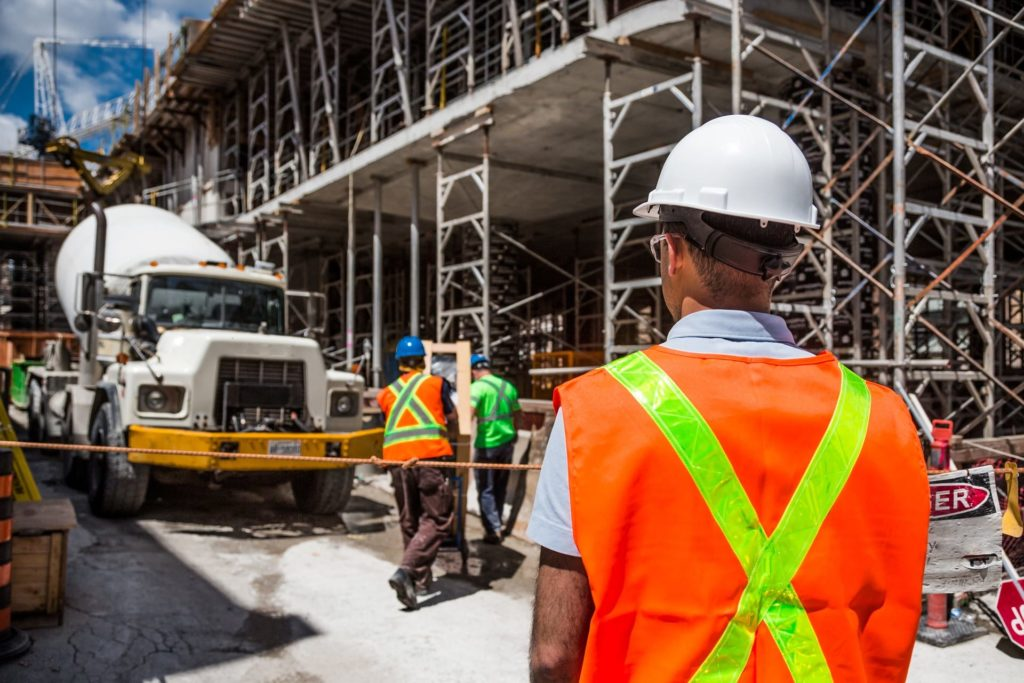

In [ ]:
pred = model.predict("/content/Construction-Site-Safety-PPE-Detection/data/images/val", conf=0.25)
pred[0].show()


In [ ]:
app_code = '''
import streamlit as st
from ultralytics import YOLO
import numpy as np, cv2
from PIL import Image

st.set_page_config(page_title="PPE Compliance Detection", layout="wide")
st.title("🦺 PPE Compliance Dashboard – FA-2 Project")

@st.cache_resource
def load_model():
    return YOLO("runs/detect/ppe_final_model/weights/best.pt")

model = load_model()
uploaded = st.file_uploader("Upload a site image", type=["jpg","png","jpeg"])
if uploaded:
    img = Image.open(uploaded).convert("RGB")
    arr = np.array(img)[:,:,::-1]
    res = model.predict(arr, conf=0.25)
    out = res[0].plot()
    st.image(out[:, :, ::-1], caption="Detections", use_container_width=True)


    # Simple compliance logic
    classes = [model.names[int(x.cls)] for x in res[0].boxes]
    c = {"hardhat":0,"safety_vest":0,"mask":0}
    for cls in classes:
        if cls in c: c[cls]+=1
    total = len(classes)
    full = sum(1 for v in c.values() if v>0)
    if full==3: st.success("✅ Green: Fully Compliant")
    elif full in [1,2]: st.warning("🟡 Yellow: Partial Compliance")
    else: st.error("🔴 Red: Non-Compliant")
'''
open("app.py","w").write(app_code)
print("✅ Streamlit app created successfully")


✅ Streamlit app created successfully


In [ ]:
from pyngrok import ngrok
!ngrok config add-authtoken 3517IOssOhNfJo1zztnj2jMwcQV_KB3xvLwXPh98cMuyYuHU


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import subprocess, time
proc = subprocess.Popen(["streamlit","run","app.py","--server.port","8501"])
time.sleep(5)
public_url = ngrok.connect(8501)
print("🌐 Streamlit public URL:", public_url)


🌐 Streamlit public URL: NgrokTunnel: "https://unedible-balmiest-arjun.ngrok-free.dev" -> "http://localhost:8501"
